<a href="https://colab.research.google.com/github/Chhaya-cloud/Chatbot/blob/main/Bootcamp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd # Import pandas if you haven't already
from sklearn.tree import plot_tree # Import the plot_tree function
import matplotlib.pyplot as plt

data = pd.read_csv('/content/sample_data/Heart_disease_cleveland_new.csv')



data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [54]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [55]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [56]:
data.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0
6,62,0,3,140,268,0,2,160,0,3.6,2,2,1,1
7,57,0,3,120,354,0,0,163,1,0.6,0,0,1,0
8,63,1,3,130,254,0,2,147,0,1.4,1,1,3,1
9,53,1,3,140,203,1,2,155,1,3.1,2,0,3,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.122300,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.367911,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.259835,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.126879,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.030438,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.054164,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.019115,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.257980,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.321680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.333925,0.424510


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

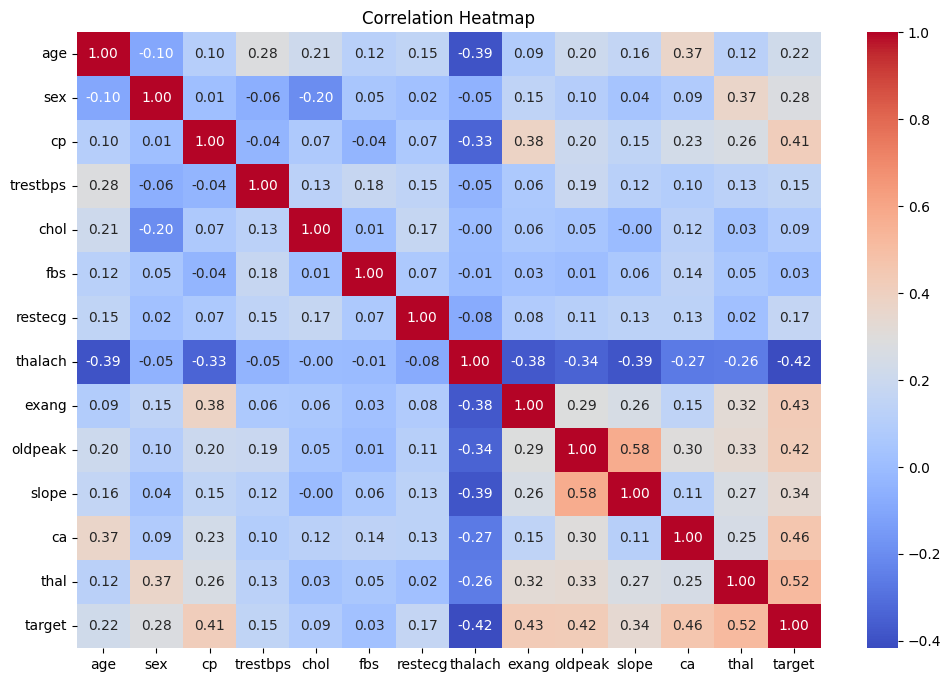

In [60]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True, fmt='.2f' , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

If linear then use logistic regression
this is a non linear dataset

<ipython-input-61-56ef1391204a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='coolwarm')


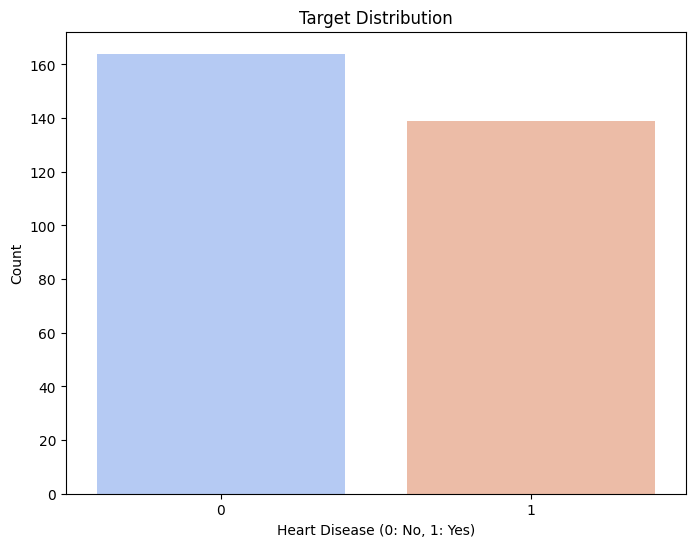

In [61]:
# target DIstribution
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=data, palette='coolwarm')
plt.title("Target Distribution")
plt.xlabel("Heart Disease (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()


Data is balanced

In [62]:
X=data.drop('target',axis=1)
y=data['target']


axis=1 means working on columns, axis=0, means working on rows

In [63]:
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1


In [64]:
y

,target
0,0
1,1
2,1
3,0
4,0
...,...
298,1
299,1
300,1
301,1


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
X_scaled

array([[ 0.94872647,  0.68620244, -2.25177456, ...,  2.27457861,
        -0.71113139,  0.17622495],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         2.5048807 , -0.87075858],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         1.43287667,  1.22320848],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.64911323,
         0.36087264,  1.22320848],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.64911323,
         0.36087264, -0.87075858],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.97635214,
        -0.71113139, -0.87075858]])

In [68]:
from sklearn.model_selection import train_test_split


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [70]:
X_train

array([[-2.81911474,  0.68620244, -1.20852121, ..., -0.97635214,
        -0.71113139, -0.87075858],
       [ 0.28381332,  0.68620244, -0.16526786, ..., -0.97635214,
         0.36087264,  1.22320848],
       [ 1.61363963,  0.68620244, -2.25177456, ...,  0.64911323,
         0.36087264, -0.87075858],
       ...,
       [ 0.50545103,  0.68620244,  0.87798549, ..., -0.97635214,
         0.36087264,  1.22320848],
       [ 0.72708875,  0.68620244,  0.87798549, ..., -0.97635214,
         0.36087264,  1.22320848],
       [ 0.28381332, -1.4572959 ,  0.87798549, ..., -0.97635214,
         0.36087264, -0.87075858]])

In [71]:
X_test

array([[-1.59462121e-01,  6.86202438e-01, -1.65267857e-01,
        -9.61698043e-02, -1.34078245e-02,  2.39443800e+00,
         1.01668424e+00,  1.02432497e+00, -6.96630546e-01,
        -8.96861716e-01, -9.76352138e-01,  2.50488070e+00,
        -8.70758579e-01],
       [-4.86432616e-02,  6.86202438e-01,  8.77985492e-01,
        -1.23442960e+00, -7.87230839e-01, -4.17634535e-01,
         1.01668424e+00, -1.82190531e+00,  1.43548113e+00,
        -8.96861716e-01,  6.49113235e-01,  3.60872644e-01,
        -8.70758579e-01],
       [ 1.72994457e-01,  6.86202438e-01,  8.77985492e-01,
        -3.80734753e-01,  4.46289016e-02,  2.39443800e+00,
         1.01668424e+00, -2.45531619e-01,  1.43548113e+00,
         1.38372950e-01,  6.49113235e-01,  3.60872644e-01,
        -8.70758579e-01],
       [ 3.94632175e-01,  6.86202438e-01,  8.77985492e-01,
        -1.80355949e+00, -2.45554729e-01, -4.17634535e-01,
        -9.96749253e-01,  2.79926278e-01, -6.96630546e-01,
        -8.10592160e-01, -9.76352138e

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((242, 13), (61, 13), (242,), (61,))

242 rows, 13 columns
61 rows and 13 columns
242 rows
61 rows

In [73]:
# Initialize and train model
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
model = DecisionTreeClassifier(criterion='entropy') # Changed 'Entropy' to 'entropy'
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [74]:
# Make Predictions
y_pred = model.predict(X_test)

In [75]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [76]:
y_test

,target
179,0
228,1
111,1
246,1
60,1
...,...
249,0
104,1
300,1
193,1


In [77]:
import matplotlib.pyplot as plt

In [78]:
# Classification report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



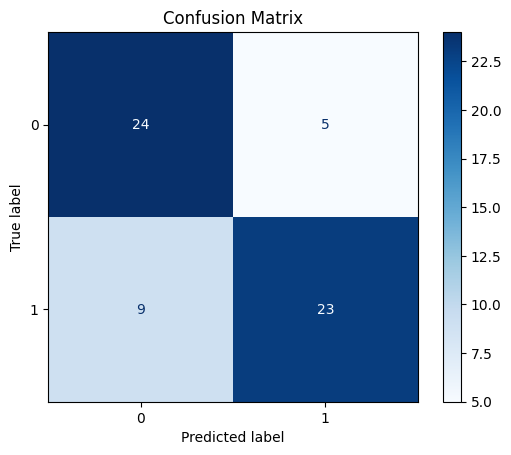

In [79]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

NameError: name 'X_original' is not defined

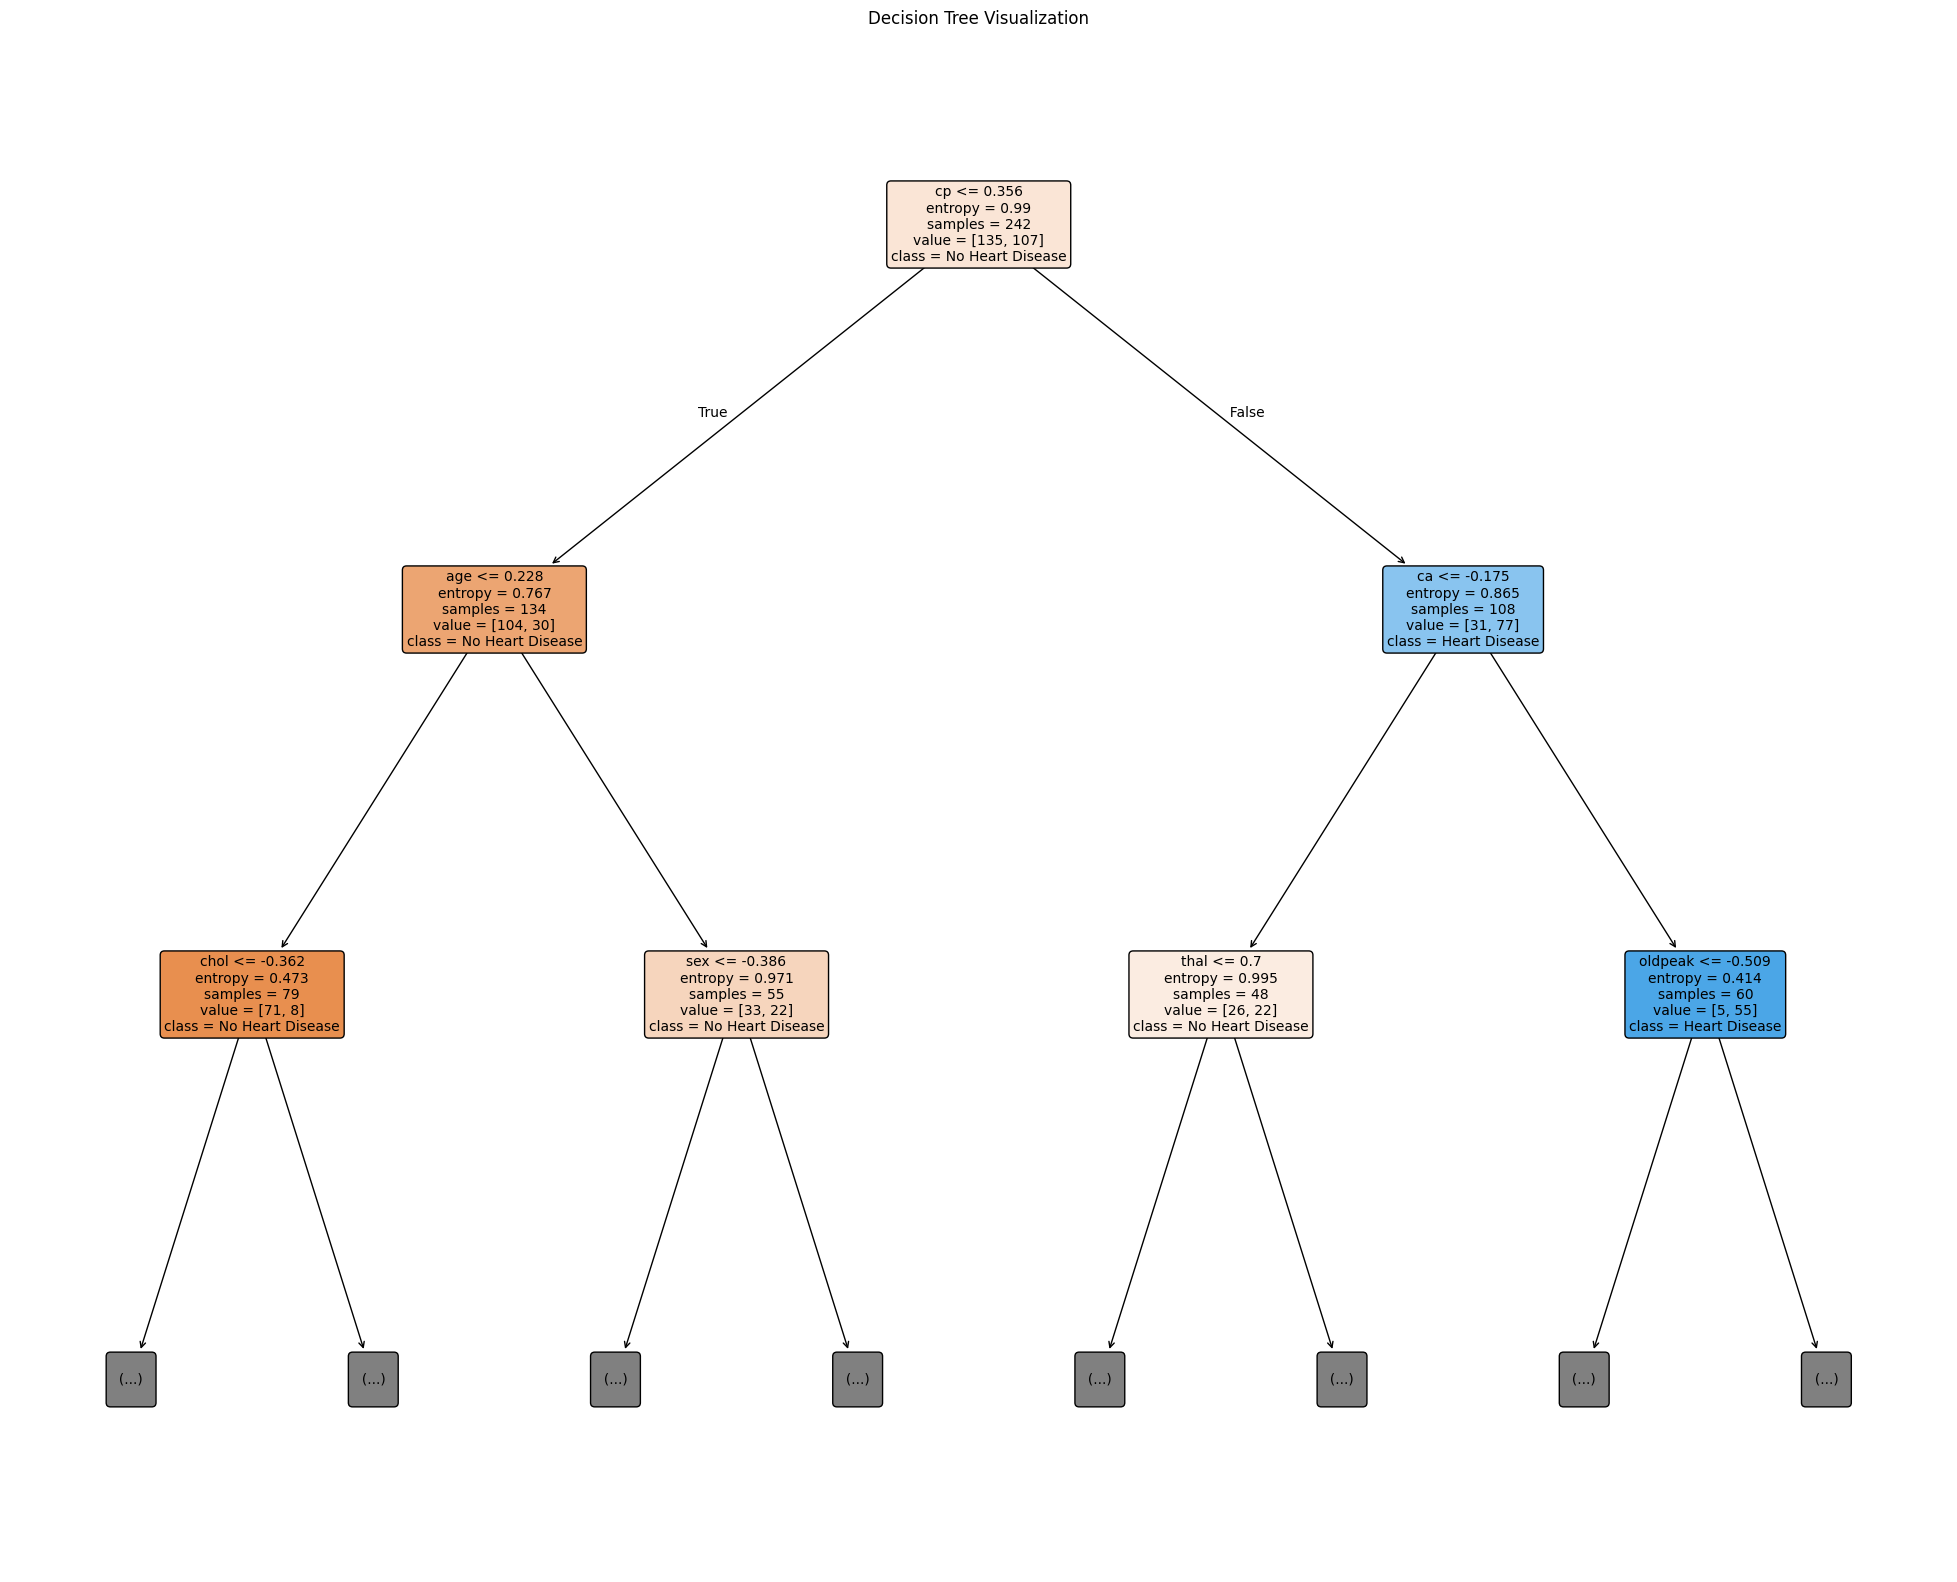

In [83]:
# Visualizing the decision tree
plt.figure(figsize=(25, 20))
plot_tree(model, filled=True, feature_names=X.columns,
          class_names=['No Heart Disease', 'Heart Disease'],
          rounded=True, fontsize=10, max_depth=2)
plt.title("Decision Tree Visualization")
plt.show()